In [ ]:
import numpy as np
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/datasets/test.csv')

In [ ]:
test.shape

(68720, 11)

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [ ]:
df.shape

(29451, 12)

In [ ]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

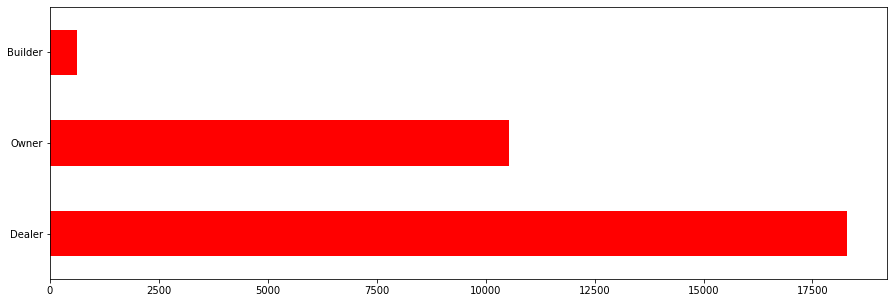

In [ ]:
plt.figure(figsize=(15,5))
df['POSTED_BY'].value_counts().plot(kind='barh',color='r')
plt.show()

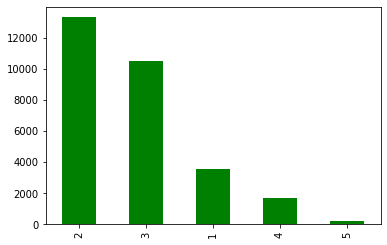

In [ ]:
df['BHK_NO.'].value_counts()[:5].plot(kind='bar',color='g')

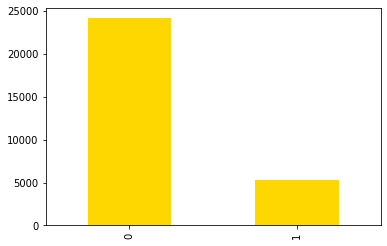

In [ ]:
df['UNDER_CONSTRUCTION'].value_counts().plot(kind='bar',color='gold')

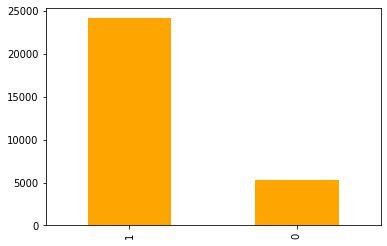

In [ ]:
df['READY_TO_MOVE'].value_counts().plot(kind='bar',color='orange')

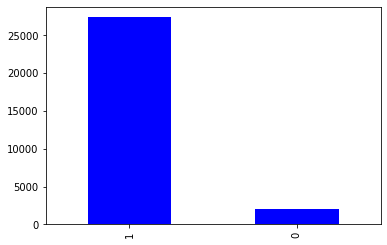

In [ ]:
df['RESALE'].value_counts().plot(kind='bar',color='blue')

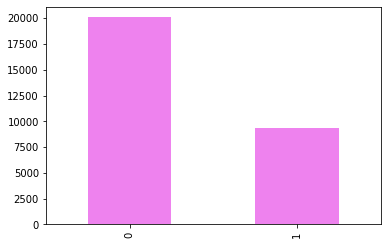

In [ ]:
df['RERA'].value_counts().plot(kind='bar',color='violet')

In [ ]:
X_full = df.dropna(axis = 0, subset = ["TARGET(PRICE_IN_LACS)"])
X = X_full.drop(["TARGET(PRICE_IN_LACS)"], axis = 1)
y = X_full["TARGET(PRICE_IN_LACS)"]

In [ ]:
categorical_cols = [cname for cname in X.columns 
                    if X[cname].nunique() <= 10 and
                    X[cname].dtypes=="object"
                   ]

numerical_cols = [cname for cname in X.columns
                  if X[cname].dtypes in ["int64","float64"]
                 ]

my_cols = categorical_cols + numerical_cols
X = X[my_cols]
print(X.shape)
X_test = test[my_cols]
print(X_test.shape)

(29451, 10)
(68720, 10)


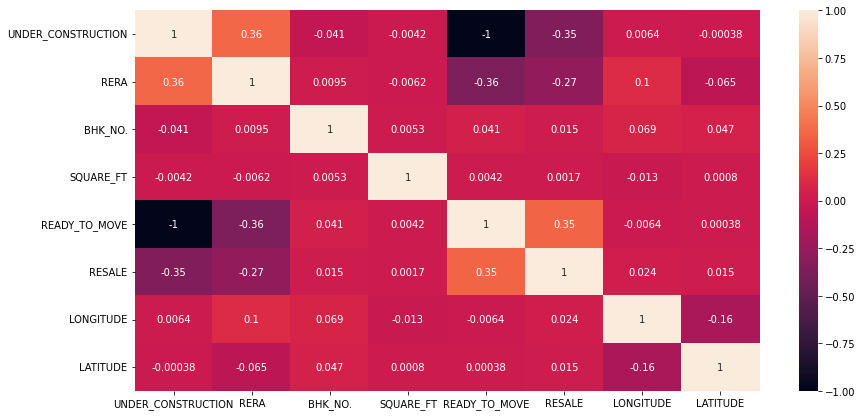

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(14,7))
corr = X.corr()
sns.heatmap(data=corr, annot= True)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

print("Shape of X_train : ",X_train.shape)
print("Shape of X_valid : ",X_valid.shape)

Shape of X_train :  (23560, 10)
Shape of X_valid :  (5891, 10)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from xgboost import XGBRegressor

In [ ]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
def get_scores(learning_rate, n_estimators = 250):
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGBRegressor(n_estimators=n_estimators, learning_rate = learning_rate))
                     ])
    scores = (-1)*cross_val_score(my_pipeline, X_train, y_train, 
                cv=5, 
                scoring = 'neg_mean_absolute_error')
    mean_score = scores.mean()
    
    return mean_score

In [ ]:
n_estimator_best = 250
learning_rate_best = .1

In [ ]:
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGBRegressor(n_estimators=n_estimator_best, learning_rate = learning_rate_best))
                     ])

my_pipeline.fit(X,y)

[14:46:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='constant',
                                                                verbose=0),
                                                  ['UNDER_CONSTRUCTION', 'RERA',
                                                   'BHK_NO.', 'SQUARE_FT',
                                                   'READY_TO_M

In [ ]:
y_pred_final = my_pipeline.predict(X_test)

In [ ]:
X_test.shape

(68720, 10)

In [ ]:
# Save test predictions to file
output = pd.DataFrame({ 
    'TARGET(PRICE_IN_LACS)': y_pred_final})
output.to_csv('/content/drive/MyDrive/datasets/submission.csv', index=False)


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/datasets/submission.csv')
submission.shape

(68720, 1)

In [ ]:
submission.head(20)

,TARGET(PRICE_IN_LACS)
0,13.927675
1,40.990660
2,61.560284
3,69.309680
4,40.991314
5,32.160870
6,55.590640
7,91.765830
8,41.901047
9,180.081730


In [ ]:
submission.describe()

,TARGET(PRICE_IN_LACS)
count,68720.000000
mean,136.226130
std,556.402726
min,-531.246340
25%,44.971625
50%,70.188280
75%,109.338380
max,10312.231000
